<a href="https://colab.research.google.com/github/mohamed-gudle/ArtificialIntellegence/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import queue
except ImportError:
    import Queue as queue

from queue import PriorityQueue


graph = {
    'Sports Complex': {'Siwaka':450},
    'Siwaka': {'Ph.1A':10,'Ph.1B':230,'Sports Complex':450},
    'Ph.1A': {'Ph.1B':100,'Mada':850,'Siwaka':10},
    'Ph.1B': {'Phase2':112,'STC':50,'Siwaka':230},
    'STC': {'Parking lot':250,'Ph.1B':50},
    'Phase2':{'J1':600,'Phase3':500,'Ph.1B':112},
    'J1':{'Mada':200,'Phase2':600},
    'Mada':{'Parking lot':700,'J1':200,'Ph1.A':850},
    'Phase3':{'Parking lot':350,'Phase2':500},
    'Parking lot':{'Phase3':350,'STC':250,'Mada':700},
    
}

heuristic = {'Sports Complex':730,'Siwaka':405,'Ph.1A':380,'Ph.1B':280,'STC':213,'Phase2':210,'J1':500,'Phase3':160,'Mada':630,'Parking lot':0}

def Greedy(graph, start, goal):
    visited = set()
    expanded=[]
    queue = PriorityQueue()
    queue.put((0, start))



    while queue:
        cost, node = queue.get()
        current=node
        print(" current : {}".format(current))
        if current not in visited:
            visited.add(current)
            expanded.append(current)

            if current == goal:
                return node, expanded

            neighbours = graph[current]
            print(neighbours)
            for i in neighbours:
                if i not in visited:
                    total_cost = heuristic[i]
                    queue.put((total_cost, i))






path, expanded = Greedy(graph,'Sports Complex','Parking lot')
output = [char for char in path]
print("\nThe optimal path using a greedy search is : " + "->".join(output))
print("The states expanded are:")
print(expanded)



 current : Sports Complex
{'Siwaka': 450}
 current : Siwaka
{'Ph.1A': 10, 'Ph.1B': 230, 'Sports Complex': 450}
 current : Ph.1B
{'Phase2': 112, 'STC': 50, 'Siwaka': 230}
 current : Phase2
{'J1': 600, 'Phase3': 500, 'Ph.1B': 112}
 current : Phase3
{'Parking lot': 350, 'Phase2': 500}
 current : Parking lot

The optimal path using a greedy search is : P->a->r->k->i->n->g-> ->l->o->t
The states expanded are:
['Sports Complex', 'Siwaka', 'Ph.1B', 'Phase2', 'Phase3', 'Parking lot']


In [ ]:
def UCS(graph, start, goal):
    visited = set()
    expanded=[]
    queue = PriorityQueue()
    queue.put((0, start))



    while queue:
        cost, node = queue.get()
        current = node
        if current not in visited:
            visited.add(current)
            expanded.append(current)

            if current == goal:
                return node, expanded

            neighbours = graph[current]
            for i in neighbours:
                if i not in visited:
                    total_cost = cost + neighbours[i]
                    queue.put((total_cost,i))

pathUCS, expandedUCS = UCS(graph,'Sports Complex','Parking lot')
outputUCS = [char for char in path]
print("\nThe optimal path using a greedy search is : " + "->".join(output))
print("The states expanded are:")
print(expandedUCS)


The optimal path using a greedy search is : P->a->r->k->i->n->g-> ->l->o->t
The states expanded are:
['Sports Complex', 'Siwaka', 'Ph.1A', 'Ph.1B', 'STC', 'Phase2', 'Parking lot']


route_list : ['Sports Complex', 'Siwaka', 'Ph.1B', 'Phase2', 'Phase3', 'Parking lot']


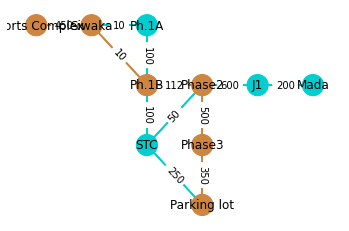

route_list for UCS : ['Sports Complex', 'Siwaka', 'Ph.1B', 'Phase2', 'Phase3', 'Parking lot']


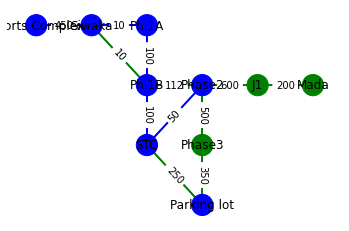

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
nodes=["Sports Complex","Siwaka"]
G.add_nodes_from(nodes)
G.nodes()#confirm nodes
#Add Edges and their weights
G.add_edge("Sports Complex","Siwaka",weight="450")
G.add_edge("Siwaka","Ph.1A",weight="10")
G.add_edge("Siwaka","Ph.1B",weight="10")
G.add_edge("Ph.1A","Ph.1B",weight="100")
G.add_edge("Ph.1B","STC",weight="100")
G.add_edge("Ph.1B","Phase2",weight="112")
G.add_edge("Phase2","J1",weight="600")
G.add_edge("J1","Mada",weight="200")
G.add_edge("Phase2","Phase3",weight="500")
G.add_edge("Phase3","Parking lot",weight="350")
G.add_edge("STC","Parking lot",weight="250")
G.add_edge("Phase2","STC",weight="50")

#position the nodes to resemble Nairobis map
G.nodes["Sports Complex"]['pos']=(1,7)
G.nodes["Siwaka"]['pos']=(3,7)
G.nodes["Ph.1A"]['pos']=(5,7)
G.nodes["Ph.1B"]['pos']=(5,5)
G.nodes["STC"]['pos']=(5,3)
G.nodes["Phase2"]['pos']=(7,5)
G.nodes["J1"]['pos']=(9,5)
G.nodes["Mada"]['pos']=(11,5)
G.nodes["Phase3"]['pos']=(7,3)
G.nodes["Parking lot"]['pos']=(7,1)


#store all positions in a variable
node_pos = nx.get_node_attributes(G,'pos')
#call BFS to return set of all possible routes to the goal

print("route_list : {}".format(expanded))
route_list = expanded
#color the nodes in the route_bfs
node_col = ['darkturquoise' if not node in route_list else 'peru' for node in G.nodes()]
peru_colored_edges = list(zip(route_list,route_list[1:]))
#color the edges as well
#print(peru_colored_edges)
edge_col = ['darkturquoise' if not edge in peru_colored_edges else 'peru' for edge in G.edges()]
arc_weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, node_pos,node_color= node_col, node_size=450)
nx.draw_networkx_edges(G, node_pos,width=2,edge_color= edge_col)
#nx.draw_networkx_edge_labels(G, node_pos,edge_color= edge_col, edge_labels=arc_weight)


nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
plt.axis('off')
plt.show()




print("route_list for UCS : {}".format(expanded))
route_list = expandedUCS
#color the nodes in the route_bfs
node_col = ['green' if not node in route_list else 'blue' for node in G.nodes()]
peru_colored_edges = list(zip(route_list,route_list[1:]))
#color the edges as well
#print(peru_colored_edges)
edge_col = ['green' if not edge in peru_colored_edges else 'blue' for edge in G.edges()]
arc_weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, node_pos,node_color= node_col, node_size=450)
nx.draw_networkx_edges(G, node_pos,width=2,edge_color= edge_col)
#nx.draw_networkx_edge_labels(G, node_pos,edge_color= edge_col, edge_labels=arc_weight)


nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
plt.axis('off')
plt.show()